# Task#4 Exploratory Data Analysis - Terrorism

# Dataset -‘Global Terrorism’

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Terrorism .csv",encoding='ISO-8859-1')

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (29,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,ishostkid,kidhijcountry,hostkidoutcome_txt,nreleased,scite1,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1.990000e+11,1986,9,16,0,186,Sri Lanka,6,South Asia,Northern,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9
1,1.990000e+11,1986,10,6,0,183,South Africa,11,Sub-Saharan Africa,Unknown,...,0.0,NaN,NaN,NaN,NaN,PGIS,0,0,0,0
2,1.990000e+11,1986,9,24,0,186,Sri Lanka,6,South Asia,Eastern,...,0.0,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9
3,1.990000e+11,1986,10,4,0,186,Sri Lanka,6,South Asia,Unknown,...,0.0,NaN,NaN,NaN,NaN,PGIS,0,1,0,1
4,1.990000e+11,1986,10,12,0,186,Sri Lanka,6,South Asia,Northern,...,0.0,NaN,NaN,NaN,NaN,PGIS,0,1,0,1


In [4]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,weapsubtype1,nkill,nwound,property,ishostkid,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,160923.000000,171378.000000,165380.000000,181691.000000,181513.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.003238e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,11.117162,2.403272,3.167668,-0.544556,0.059054,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.383523e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,6.495612,11.545741,35.949392,3.122889,0.461244,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,1.000000,0.000000,0.000000,-9.000000,-9.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.990000e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,5.000000,0.000000,0.000000,0.000000,0.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.010000e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.010000e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,16.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020000e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,31.000000,1570.000000,8191.000000,1.000000,1.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.dtypes

eventid               float64
iyear                   int64
imonth                  int64
iday                    int64
extended                int64
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
doubtterr             float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
targtype1               int64
targtype1_txt          object
targsubtype1          float64
targsubtype1_txt       object
corp1                  object
target1                object
natlty1               float64
natlty1_txt            object
gname     

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'doubtterr', 'alternative_txt', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'gsubname', 'motive', 'guncertain1',
       'individual', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nwound', 'property',
       'ishostkid', 'kidhijcountry', 'hostkidoutcome_txt', 'nreleased',
       'scite1', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [7]:
df['provstate'].fillna('Unknown',inplace=True)
df['city'].fillna('Unknown',inplace=True)
df['location'].fillna('Unknown',inplace=True)

In [8]:
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
extended                   0
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                  0
city                       0
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location                   0
summary                66129
crit1                      0
doubtterr                  1
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
targtype1                  0
targtype1_txt              0
targsubtype1           10373
targsubtype1_txt       10373
corp1                  42550
target1                  636
natlty1                 1559
natlty1_txt             1559
gname                      0
gsubname      

# Top affected countries

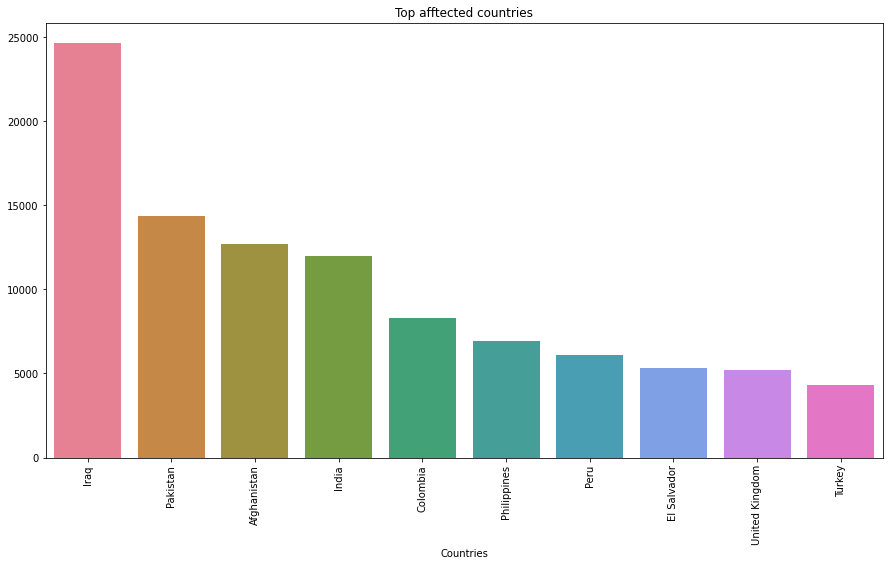

In [9]:
plt.subplots(figsize=(15,8))
sns.barplot(df['country_txt'].value_counts()[:10].index,df['country_txt'].value_counts()[:10].values,palette='husl')
plt.title('Top afftected countries')
plt.xticks(rotation= 90)
plt.xlabel('Countries');

In [10]:
df_new=df[df['country_txt'].isin(["Iraq","Pakistan","Afghanistan","India","Colombia","Philippines","Peru","El Salvador","United Kingdom","Turkey"])]

In [11]:
from geopandas import GeoDataFrame

In [12]:
#combining latitude longitude in point
df_geo =gpd.GeoDataFrame(df_new,geometry=gpd.points_from_xy(df_new.longitude,df_new.latitude))

In [13]:
#using world data from geopandas
world_data =gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


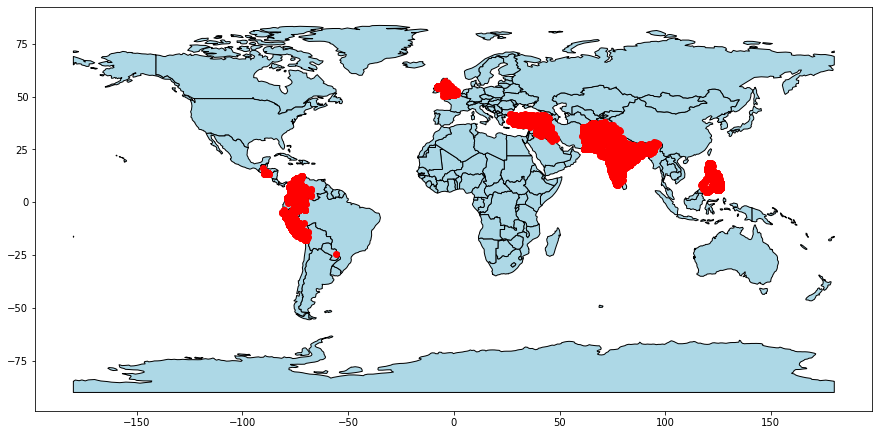

In [14]:
axis =world_data.plot(color='lightblue',edgecolor='black')
df_geo.plot(ax=axis,color='red')

fig =matplotlib.pyplot.gcf()
fig.set_size_inches(15,10)


In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(df['country_txt'].value_counts()[:10].index,df['country_txt'].value_counts()[:10].values,palette='husl')
plt.title('Top afftected countries')
plt.xticks(rotation= 90)
plt.xlabel('Countries');

In [15]:
df['city'].value_counts()[1:10].index

Index(['Baghdad', 'Karachi', 'Lima', 'Mosul', 'Belfast', 'Santiago',
       'Mogadishu', 'San Salvador', 'Istanbul'],
      dtype='object')

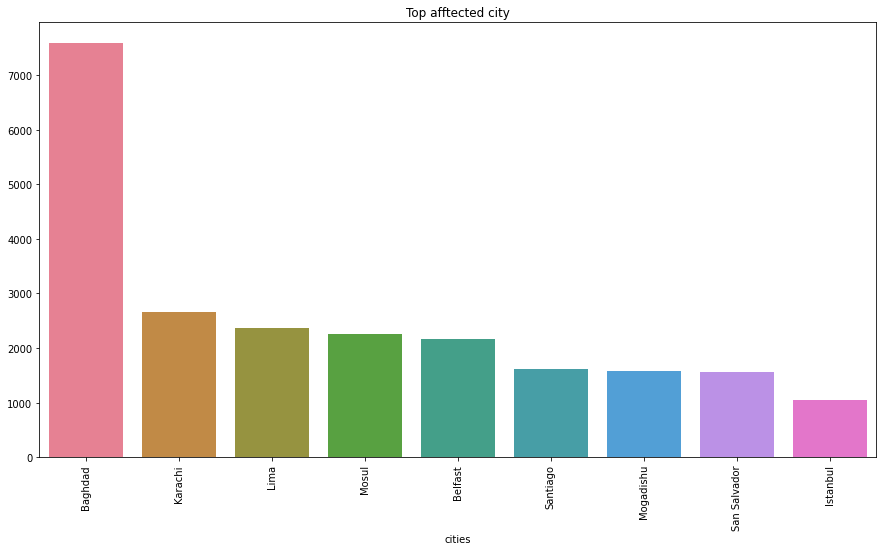

In [16]:
plt.subplots(figsize=(15,8))
sns.barplot(df['city'].value_counts()[1:10].index,df['city'].value_counts()[1:10].values,palette='husl')
plt.title('Top afftected city')
plt.xticks(rotation= 90)
plt.xlabel('cities');

In [17]:
df_city=df[df['city'].isin(['Baghdad','Karachi','Lima','Mosul','Belfast','Santiago','Mogadishu','San Salvador','Istanbul'])]

In [18]:
#combining latitude longitude in point
df_city =gpd.GeoDataFrame(df_city,geometry=gpd.points_from_xy(df_city.longitude,df_city.latitude))

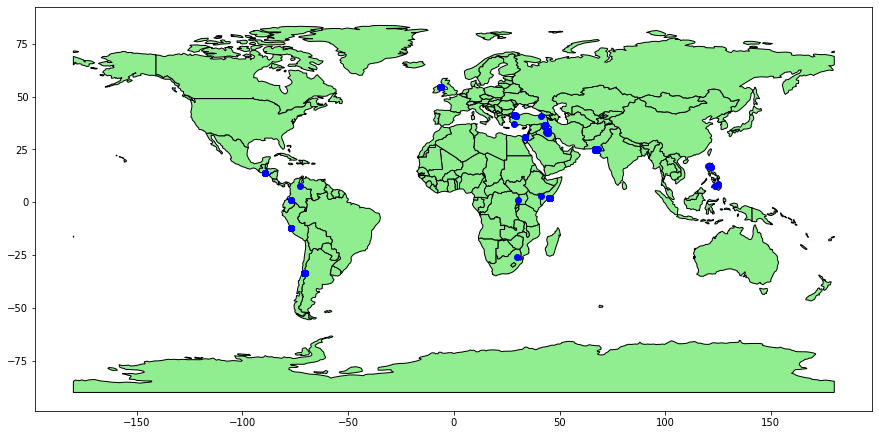

In [19]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
axis =world_data.plot(color='lightgreen',edgecolor='black')
df_city.plot(ax=axis,color='blue')

fig =matplotlib.pyplot.gcf()
fig.set_size_inches(15,10)

                

# Top terrorist group

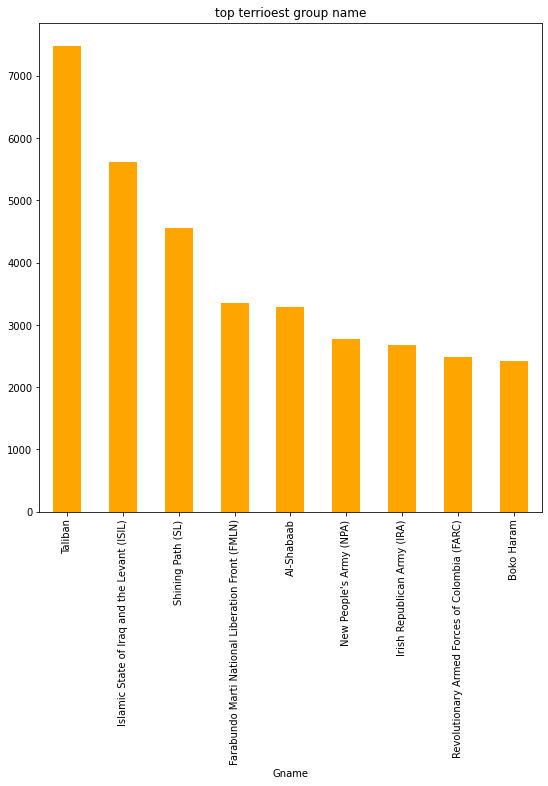

In [16]:
plt.figure(figsize=(9, 9))
df['gname'].value_counts()[1:10].plot(kind='bar', color = 'orange');
plt.title('top terrioest group name')
plt.xlabel('Gname');

# Nationality 

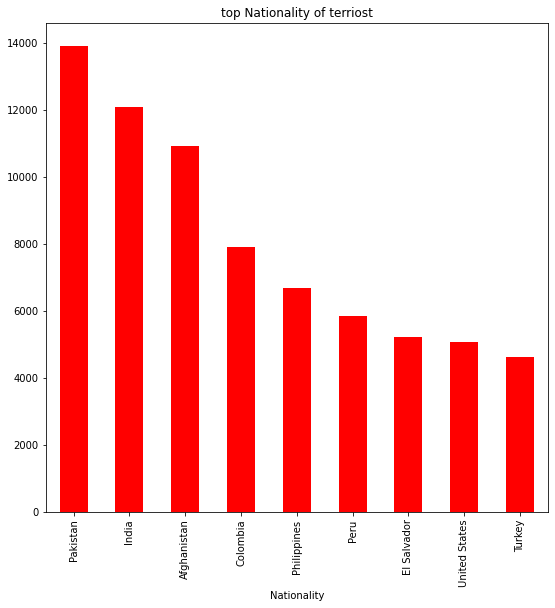

In [17]:
plt.figure(figsize=(9, 9))
df['natlty1_txt'].value_counts()[1:10].plot(kind='bar', color = 'red');
plt.title('top Nationality of terriost')
plt.xlabel('Nationality');

In [18]:
df_reg = df.groupby('iyear').count()[1:10]['nkill'].reset_index()

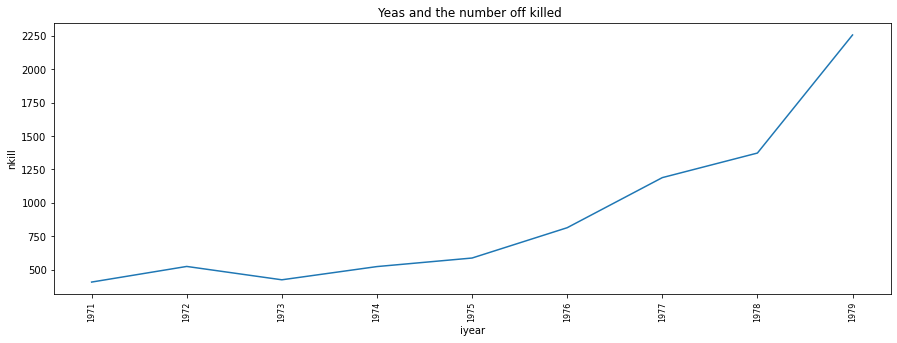

In [19]:
plt.figure(figsize=[15,5])
plt.plot(df_reg['iyear'],df_reg['nkill'])
plt.xticks(rotation = 'vertical',size=8)

plt.title('Yeas and the number off killed ')
plt.ylabel('nkill')
plt.xlabel('iyear')
plt.show()


# Terriost targeting most of the time 

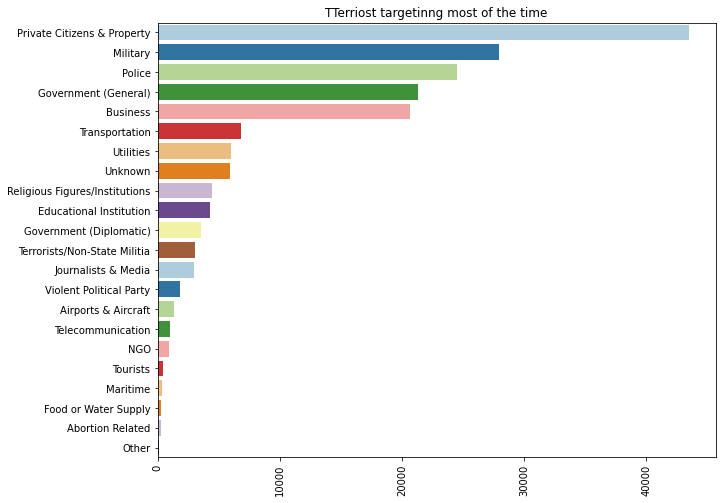

In [20]:
sns.barplot(df['targtype1_txt'].value_counts().values,df['targtype1_txt'].value_counts().index,palette='Paired')
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('TTerriost targetinng most of the time')
plt.show()

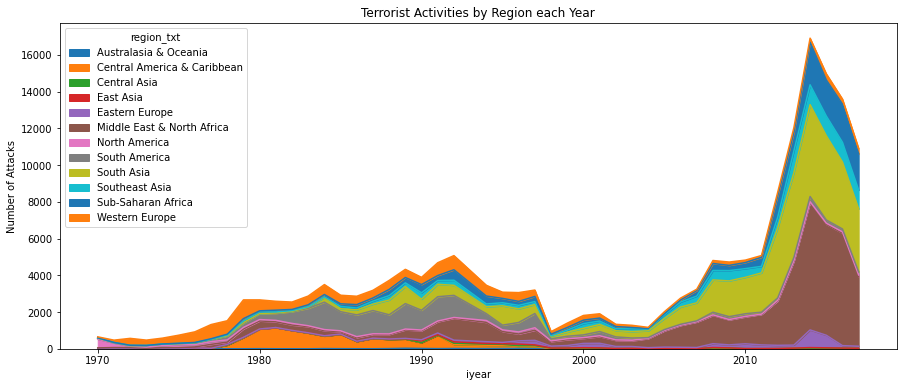

In [21]:
pd.crosstab(df.iyear, df.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region each Year')
plt.ylabel('Number of Attacks')
plt.show()

# Top cities affected

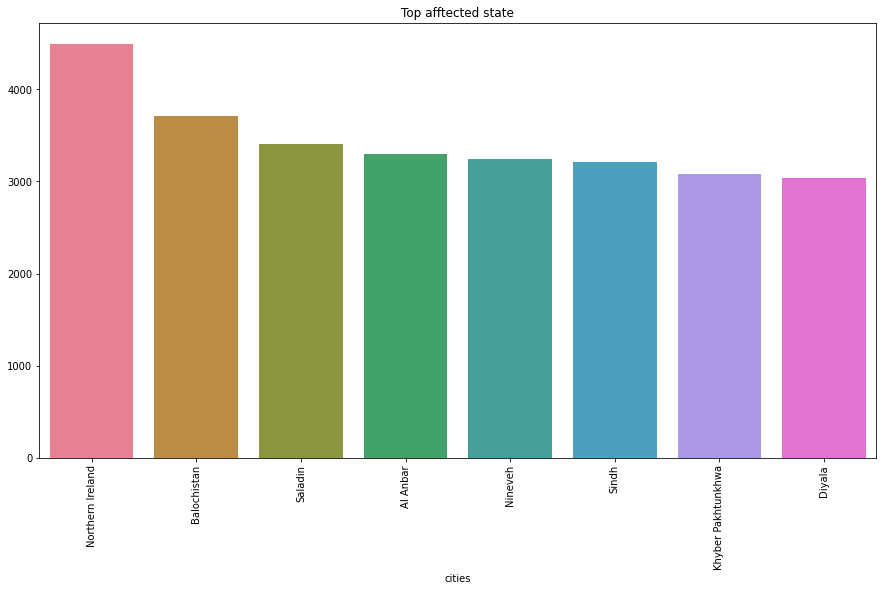

In [96]:
plt.subplots(figsize=(15,8))
sns.barplot(df['provstate'].value_counts()[2:10].index,df['provstate'].value_counts()[2:10].values,palette='husl')
plt.title('Top afftected state')
plt.xticks(rotation= 90)
plt.xlabel('cities');

In [23]:
#The region which was close to the attack considering 1 as yes and 0 as no


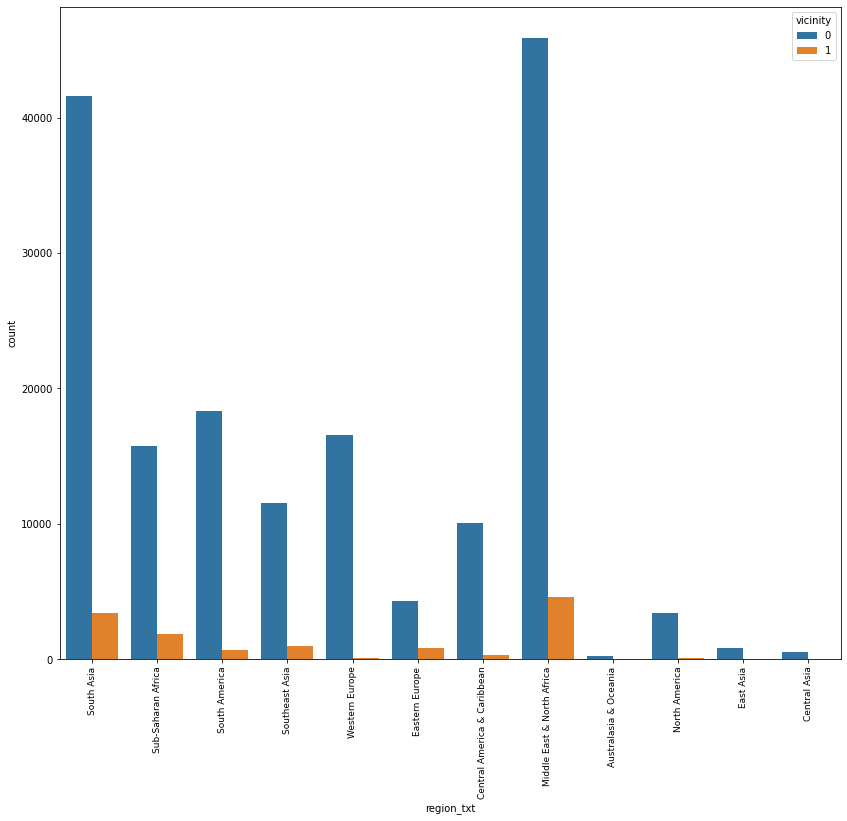

In [24]:
plt.figure(figsize=(14,12))
plt.xticks(rotation = 'vertical',size=9)
sns.countplot(x='region_txt', hue = 'vicinity', data=df);